# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (32414, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
31477,47750,p185738,3afe10b996b7646d8641985a4b4b570d,Mrs.,UT,2016-01-05 01:05:00,Grades PreK-2,Math & Science,Mathematics,Math is Fun!,"\""The only way to learn mathematics is to do m...",My students love coming to school and working ...,My students will be using these math manipulat...,Learning about money is important so the stude...,"My students need base ten blocks, realistic pl...",0,1
3287,159755,p147002,6ada7036aeb258d3653589d1f2a5b815,Mrs.,CA,2016-01-05 02:02:00,Grades 3-5,"Literacy & Language, Special Needs","Literacy, Special Needs","Multimedia, Apps, and a Game",My students need new ways to learn. Research i...,My students are elementary students in kinderg...,My students are pulled from their general educ...,This donation will improve motivate my student...,My students need multimedia comprehension mate...,2,0


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (32414, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p253737,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p258326,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
31477,47750,p185738,3afe10b996b7646d8641985a4b4b570d,Mrs.,UT,2016-01-05 01:05:00,Grades PreK-2,Math is Fun!,"\""The only way to learn mathematics is to do m...",My students love coming to school and working ...,My students will be using these math manipulat...,Learning about money is important so the stude...,"My students need base ten blocks, realistic pl...",0,1,Math_Science,Mathematics,"\""The only way to learn mathematics is to do m..."
3287,159755,p147002,6ada7036aeb258d3653589d1f2a5b815,Mrs.,CA,2016-01-05 02:02:00,Grades 3-5,"Multimedia, Apps, and a Game",My students need new ways to learn. Research i...,My students are elementary students in kinderg...,My students are pulled from their general educ...,This donation will improve motivate my student...,My students need multimedia comprehension mate...,2,0,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,My students need new ways to learn. Research i...


#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

\"The only way to learn mathematics is to do mathematics.\"\r\n-Paul Halmos.\r\nMy students love math time and using the hands-on manipulative's to make sense of what is being taught.My students love coming to school and working as hard as they can to learn new concepts everyday.  They especially love working with the math manipulative's and they are always coming up with new discoveries.\r\nOur school is a Title I school where over 50% of our population receives free or reduced lunch. Many of these children come from low-income families but this doesn't hinder their desire to learn.My students will be using these math manipulative's on a daily basis during our math block time.  The students will each have opportunities to explore and make connections that make math more concrete and help them relate to the concepts being taught.\r\nThey will be learning about our base ten number system and learn about money which are both important real life skills.Learning about money is important so

IndexError: index 99999 is out of bounds for axis 0 with size 32414

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Our school is filled with the laughter and smiles of our beautiful elementary students. But there are some children, our exceptional students, who face many obstacles and challenges at school and in their communities.  This wonderful group of exceptional children will not let anything get in their way of learning and fun.\r\n\r\nOur ESE unit is composed of the most amazing kindergarten through 5th grade exceptional education students, many who are on the Autism Spectrum or must contend with various exceptionalities. \r\n\r\nAs part of a title I school, many of these students' families have great financial needs.  Our students are in need of basic services and qualify for the free lunch program.  Recognizing these needs, our teachers turn to donors like you to help us provide basic supplies for our children.  Every donation directly helps these students!As a Title I school, many of our students families struggle each day to provide the necessary home and school supplies our students nee

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our school is filled with the laughter and smiles of our beautiful elementary students. But there are some children, our exceptional students, who face many obstacles and challenges at school and in their communities.  This wonderful group of exceptional children will not let anything get in their way of learning and fun.    Our ESE unit is composed of the most amazing kindergarten through 5th grade exceptional education students, many who are on the Autism Spectrum or must contend with various exceptionalities.     As part of a title I school, many of these students' families have great financial needs.  Our students are in need of basic services and qualify for the free lunch program.  Recognizing these needs, our teachers turn to donors like you to help us provide basic supplies for our children.  Every donation directly helps these students!As a Title I school, many of our students families struggle each day to provide the necessary home and school supplies our students need.  Chil

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our school is filled with the laughter and smiles of our beautiful elementary students But there are some children our exceptional students who face many obstacles and challenges at school and in their communities This wonderful group of exceptional children will not let anything get in their way of learning and fun Our ESE unit is composed of the most amazing kindergarten through 5th grade exceptional education students many who are on the Autism Spectrum or must contend with various exceptionalities As part of a title I school many of these students families have great financial needs Our students are in need of basic services and qualify for the free lunch program Recognizing these needs our teachers turn to donors like you to help us provide basic supplies for our children Every donation directly helps these students As a Title I school many of our students families struggle each day to provide the necessary home and school supplies our students need Children use and abuse some ite

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 32414/32414 [00:39<00:00, 827.81it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'school filled laughter smiles beautiful elementary students children exceptional students face many obstacles challenges school communities wonderful group exceptional children not let anything get way learning fun ese unit composed amazing kindergarten 5th grade exceptional education students many autism spectrum must contend various exceptionalities part title school many students families great financial needs students need basic services qualify free lunch program recognizing needs teachers turn donors like help us provide basic supplies children every donation directly helps students title school many students families struggle day provide necessary home school supplies students need children use abuse items especially backpacks students need new backpacks replace backpacks may small damaged lost experienced heavy books students take home backpacks getting heavier heavier students need sturdy strong backpacks help load carry providing replacement backpack not help families saving

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# printing some project titles.
for i in range (0,21):
    
    print(project_data['project_title'].values[i])
    print("="*50)

Math is Fun!
Multimedia, Apps, and a Game
Colorful Writing
Let's Walk a Mile
Listen, Listen Who's got the Story?
Kinder fun
New Volleyballs for our Girls Volleyball Team
Classroom Supplies
Sharpening to Success!
iPads for my Little Learners
Bullying, Boys and Books: A Novel Study Through \"Crash\"
Love to Learn, Love to Play
Empowering Students Through Art
360 Camera
Empowering Students Through Art: \"Glass\" Panel Poetry Books
Back to Basics
Twenty-First Century Learning
Writers Wanted!
***Just BOOKS***
Comfy Cozy Cooperative learning
Hot New Books for the END of the School Year!!!!


In [19]:
preprocessed_titles = []

for dataset in tqdm(project_data['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    preprocessed_titles.append(data.lower().strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 32414/32414 [00:02<00:00, 15687.46it/s]


In [20]:
for i in range (0,21):
    print(preprocessed_titles[i])
    print("="*50)

math fun
multimedia apps game
colorful writing
let walk mile
listen listen who got story
kinder fun
new volleyballs girls volleyball team
classroom supplies
sharpening success
ipads little learners
bullying boys books a novel study through crash
love learn love play
empowering students through art
camera
empowering students through art glass panel poetry books
back basics
twenty first century learning
writers wanted
just books
comfy cozy cooperative learning
hot new books end school year


Observation: As we can see after preprocessing data do not have any special characters, symbols, stopwords and all the words are in lowercase

## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (32414, 9)


In [23]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (32414, 30)


In [24]:
school_state_vectorizer = CountVectorizer(lowercase=False, binary=True)
school_state_vectorizer.fit(project_data['school_state'].values)
print(school_state_vectorizer.get_feature_names())

school_state_one_hot = school_state_vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)
print("the type of count vectorizer ",type(school_state_one_hot))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (32414, 51)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>


In [25]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data["teacher_prefix"].fillna("No_Prefix", inplace = True)
    
teacher_prefix_vectorizer = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(project_data['teacher_prefix'].values)
print(teacher_prefix_vectorizer.get_feature_names())

teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mr', 'Mrs', 'Ms', 'No_Prefix', 'Teacher']
Shape of matrix after one hot encodig  (32414, 5)


In [26]:
my_grade_counter = Counter()

for project_grade in project_data['project_grade_category'].values:
    my_grade_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_grade_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
    
grade_cat_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
grade_cat_vectorizer.fit(project_data['project_grade_category'].values)
print(grade_cat_vectorizer.get_feature_names())

grade_cat_one_hot = grade_cat_vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (32414, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (32414, 10197)


In [28]:
titles_vectorizer = CountVectorizer(min_df=10)
titles_bow = titles_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_vectorizer.get_feature_names()[0:10])
print("Shape of matrix after one hot encodig ",titles_bow.shape)
print("the type of count vectorizer ",type(titles_bow))
print("the number of unique words ", titles_bow.get_shape()[1])

some sample features(unique words in the corpus) ['abc', 'about', 'academic', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving']
Shape of matrix after one hot encodig  (32414, 1601)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1601


#### 1.5.2.2 TFIDF vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (32414, 10197)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32414/32414 [00:17<00:00, 1816.09it/s]


32414
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32414/32414 [02:09<00:00, 249.70it/s]


32414
300


In [35]:
# TFIDF on project titles
titles_tfidf_vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = titles_tfidf_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_tfidf_vectorizer.get_feature_names()[10:21])
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

some sample features(unique words in the corpus) ['across', 'act', 'action', 'active', 'activities', 'activity', 'add', 'adding', 'adventure', 'adventures', 'after']
Shape of matrix after one hot encodig  (32414, 1601)


In [36]:
# AVG W2V on project title
avg_w2v_titles_vectors = [];

for sentence in tqdm(preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    avg_w2v_titles_vectors.append(vector_titles)

print(len(avg_w2v_titles_vectors))
print(len(avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32414/32414 [00:00<00:00, 35564.23it/s]


32414
300


In [37]:
# TFIDF weighted W2V on project_title
titles_tfidf_model = TfidfVectorizer()
titles_tfidf_model.fit(preprocessed_titles)
titles_dictionary = dict(zip(titles_tfidf_model.get_feature_names(), list(titles_tfidf_model.idf_)))
titles_tfidf_words = set(titles_tfidf_model.get_feature_names())



In [38]:
titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    titles_tfidf_w2v_vectors.append(titles_vector)

print(len(titles_tfidf_w2v_vectors))
print(len(titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32414/32414 [00:01<00:00, 16402.83it/s]


32414
300


### 1.5.3 Vectorizing Numerical features

In [39]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 51.22791725797495, Standard deviation : 149.72149781041014


In [41]:
price_standardized

array([[-0.27543084],
       [-0.30882617],
       [-0.19407979],
       ..., 
       [-0.20890732],
       [-0.13343386],
       [-0.29880757]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [42]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(32414, 9)
(32414, 30)
(32414, 10197)
(32414, 1)


In [43]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(32414, 10237)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [44]:
approved_project = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity
0,47750,p185738,3afe10b996b7646d8641985a4b4b570d,Mrs.,UT,2016-01-05 01:05:00,Grades PreK-2,Math is Fun!,"\""The only way to learn mathematics is to do m...",My students love coming to school and working ...,My students will be using these math manipulat...,Learning about money is important so the stude...,"My students need base ten blocks, realistic pl...",0,Math_Science,Mathematics,"\""The only way to learn mathematics is to do m...",9.99,2


In [45]:
# Data splitting

from sklearn.model_selection import train_test_split

# Splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(project_data, approved_project, test_size=0.33, stratify=approved_project)

# Splitting in Train Test and Cross Validation
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [46]:
# Vectorizing Categories on Train, Test and CV data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

# Fit only to train data
vectorizer.fit(X_train['clean_categories'].values)

# Transform to train,test and CV data
X_Train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_Test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
X_CV_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)

print("Shape of train matrix after one hot encodig ",X_Train_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_categories_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_categories_one_hot.shape)

Shape of train matrix after one hot encodig  (14550, 9)
Shape of test matrix after one hot encodig  (10697, 9)
Shape of cv matrix after one hot encodig  (7167, 9)


In [47]:
# Vectorizing subcategories on train, test and cv

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_Train_sub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_Test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
X_CV_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)

print("Shape of train matrix after one hot encodig ",X_Train_sub_categories_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_sub_categories_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_sub_categories_one_hot.shape)

Shape of train matrix after one hot encodig  (14550, 30)
Shape of test matrix after one hot encodig  (10697, 30)
Shape of cv matrix after one hot encodig  (7167, 30)


In [48]:
# Vectorizing school state on train , test and cv

school_state_vectorizer = CountVectorizer(lowercase=False, binary=True)

school_state_vectorizer.fit(X_train['school_state'].values)
print(school_state_vectorizer.get_feature_names())

X_Train_school_state_one_hot = school_state_vectorizer.transform(X_train['school_state'].values)
X_Test_school_state_one_hot = school_state_vectorizer.transform(X_test['school_state'].values)
X_CV_school_state_one_hot = school_state_vectorizer.transform(X_cv['school_state'].values)

print("Shape of train matrix after one hot encodig ",X_Train_school_state_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_school_state_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_school_state_one_hot.shape)

print("the type of count vectorizer ",type(X_Train_school_state_one_hot))
print("the type of count vectorizer ",type(X_Test_school_state_one_hot))
print("the type of count vectorizer ",type(X_CV_school_state_one_hot))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of train matrix after one hot encodig  (14550, 51)
Shape of test matrix after one hot encodig  (10697, 51)
Shape of cv matrix after one hot encodig  (7167, 51)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>


In [49]:
# Vectorizing teacher prefix on train , test and cv

project_data["teacher_prefix"].fillna("No_Prefix", inplace = True)
    
teacher_prefix_vectorizer = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(X_train['teacher_prefix'].values)

print(teacher_prefix_vectorizer.get_feature_names())

X_Train_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_train['teacher_prefix'].values)
X_Test_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_test['teacher_prefix'].values)
X_CV_teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(X_cv['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",X_Train_teacher_prefix_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_teacher_prefix_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_teacher_prefix_one_hot.shape)


['Mr', 'Mrs', 'Ms', 'No_Prefix', 'Teacher']
Shape of train matrix after one hot encodig  (14550, 5)
Shape of test matrix after one hot encodig  (10697, 5)
Shape of cv matrix after one hot encodig  (7167, 5)


In [50]:
# Vectorizing grade category on train , test and cv

my_grade_counter = Counter()

for project_grade in project_data['project_grade_category'].values:
    my_grade_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_grade_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
    
grade_cat_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
grade_cat_vectorizer.fit(X_train['project_grade_category'].values)
print(grade_cat_vectorizer.get_feature_names())

X_Train_grade_cat_one_hot = grade_cat_vectorizer.transform(X_train['project_grade_category'].values)
X_Test_grade_cat_one_hot = grade_cat_vectorizer.transform(X_test['project_grade_category'].values)
X_CV_grade_cat_one_hot = grade_cat_vectorizer.transform(X_cv['project_grade_category'].values)

print("Shape of train matrix after one hot encodig ",X_Train_grade_cat_one_hot.shape)
print("Shape of test matrix after one hot encodig ",X_Test_grade_cat_one_hot.shape)
print("Shape of cv matrix after one hot encodig ",X_CV_grade_cat_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of train matrix after one hot encodig  (14550, 5)
Shape of test matrix after one hot encodig  (10697, 5)
Shape of cv matrix after one hot encodig  (7167, 5)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [51]:
# merge two column text dataframe: 
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [52]:
# preprocessing essay train data
from tqdm import tqdm
X_Train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['essay'].values):
    X_Train_essay_sent = decontracted(sentance)
    X_Train_essay_sent = X_Train_essay_sent.replace('\\r', ' ')
    X_Train_essay_sent = X_Train_essay_sent.replace('\\"', ' ')
    X_Train_essay_sent = X_Train_essay_sent.replace('\\n', ' ')
    X_Train_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_Train_essay_sent)
    
    X_Train_essay_sent = ' '.join(e for e in X_Train_essay_sent.split() if e.lower() not in stopwords)
    X_Train_preprocessed_essays.append(X_Train_essay_sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 14550/14550 [00:15<00:00, 921.55it/s]


In [53]:
# preprocessing essay test data
from tqdm import tqdm
X_Test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_test['essay'].values):
    X_Test_essay_sent = decontracted(sentence)
    X_Test_essay_sent = X_Test_essay_sent.replace('\\r', ' ')
    X_Test_essay_sent = X_Test_essay_sent.replace('\\"', ' ')
    X_Test_essay_sent = X_Test_essay_sent.replace('\\n', ' ')
    X_Test_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_Test_essay_sent)
    
    X_Test_essay_sent = ' '.join(e for e in X_Test_essay_sent.split() if e.lower() not in stopwords)
    X_Test_preprocessed_essays.append(X_Test_essay_sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 10697/10697 [00:12<00:00, 827.55it/s]


In [54]:
# preprocessing essay cv data
from tqdm import tqdm
X_CV_preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['essay'].values):
    X_CV_essay_sent = decontracted(sentence)
    X_CV_essay_sent = X_CV_essay_sent.replace('\\r', ' ')
    X_CV_essay_sent = X_CV_essay_sent.replace('\\"', ' ')
    X_CV_essay_sent = X_CV_essay_sent.replace('\\n', ' ')
    X_CV_essay_sent = re.sub('[^A-Za-z0-9]+', ' ', X_CV_essay_sent)
    
    X_CV_essay_sent = ' '.join(e for e in X_CV_essay_sent.split() if e.lower() not in stopwords)
    X_CV_preprocessed_essays.append(X_CV_essay_sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████| 7167/7167 [00:08<00:00, 841.60it/s]


In [55]:
# preprocessing project title train data
X_Train_preprocessed_titles = []

for dataset in tqdm(X_train['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    X_Train_preprocessed_titles.append(data.lower().strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 14550/14550 [00:00<00:00, 16032.20it/s]


In [56]:
# preprocessing project title test data
X_Test_preprocessed_titles = []

for dataset in tqdm(X_test['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    X_Test_preprocessed_titles.append(data.lower().strip()) # Creating array in all the lower cases. 

100%|█████████████████████████████████████████████████████████████████████████| 10697/10697 [00:00<00:00, 16778.35it/s]


In [57]:
# preprocessing project title cv data
X_CV_preprocessed_titles = []

for dataset in tqdm(X_cv['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    X_CV_preprocessed_titles.append(data.lower().strip()) # Creating array in all the lower cases. 

100%|███████████████████████████████████████████████████████████████████████████| 7167/7167 [00:00<00:00, 17217.05it/s]


In [58]:
# BOW Essay train, test and cv data
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_Train_preprocessed_essays)

X_Train_essay_bow = vectorizer.transform(X_Train_preprocessed_essays)
X_Test_essay_bow = vectorizer.transform(X_Test_preprocessed_essays)
X_CV_essay_bow = vectorizer.transform(X_CV_preprocessed_essays)

print("Shape of train matrix after one hot encodig ",X_Train_essay_bow.shape)
print("Shape of test matrix after one hot encodig ",X_Test_essay_bow.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_essay_bow.shape)

Shape of train matrix after one hot encodig  (14550, 92)
Shape of test matrix after one hot encodig  (10697, 92)
Shape of CV matrix after one hot encodig  (7167, 92)


In [59]:
# BOW title train,test and cv data

titles_vectorizer = CountVectorizer(min_df=10)
titles_vectorizer.fit(X_Train_preprocessed_titles)

X_Train_titles_bow = titles_vectorizer.transform(X_Train_preprocessed_titles)
X_Test_titles_bow = titles_vectorizer.transform(X_Test_preprocessed_titles)
X_CV_titles_bow = titles_vectorizer.transform(X_CV_preprocessed_titles)

print("some sample features(unique words in the corpus)",titles_vectorizer.get_feature_names()[0:10])
print("Shape of train matrix after one hot encodig ",X_Train_titles_bow.shape)
print("Shape of test matrix after one hot encodig ",X_Test_titles_bow.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_titles_bow.shape)


some sample features(unique words in the corpus) ['about', 'academic', 'access', 'achievement', 'action', 'active', 'activities', 'activity', 'adding', 'adventure']
Shape of train matrix after one hot encodig  (14550, 898)
Shape of test matrix after one hot encodig  (10697, 898)
Shape of CV matrix after one hot encodig  (7167, 898)


In [60]:
#TFIDF essay train,test and cv data

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_Train_preprocessed_essays)

X_Train_essay_tfidf = vectorizer.transform(X_Train_preprocessed_essays)
X_Test_essay_tfidf = vectorizer.transform(X_Test_preprocessed_essays)
X_CV_essay_tfidf = vectorizer.transform(X_CV_preprocessed_essays)

print("Shape of train matrix after one hot encodig ",X_Train_essay_tfidf.shape)
print("Shape of test matrix after one hot encodig ",X_Test_essay_tfidf.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_essay_tfidf.shape)

Shape of train matrix after one hot encodig  (14550, 92)
Shape of test matrix after one hot encodig  (10697, 92)
Shape of CV matrix after one hot encodig  (7167, 92)


In [61]:
# TFIDF on project titles train,test and cv data

titles_tfidf_vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf_vectorizer.fit(X_Train_preprocessed_titles)

X_Train_titles_tfidf = titles_vectorizer.transform(X_Train_preprocessed_titles)
X_Test_titles_tfidf = titles_vectorizer.transform(X_Test_preprocessed_titles)
X_CV_titles_tfidf = titles_vectorizer.transform(X_CV_preprocessed_titles)

print("Shape of train matrix after one hot encodig ",X_Train_titles_tfidf.shape)
print("Shape of test matrix after one hot encodig ",X_Test_titles_tfidf.shape)
print("Shape of CV matrix after one hot encodig ",X_CV_titles_tfidf.shape)

Shape of train matrix after one hot encodig  (14550, 898)
Shape of test matrix after one hot encodig  (10697, 898)
Shape of CV matrix after one hot encodig  (7167, 898)


In [62]:
# average Word2Vec essay on train
# compute average word2vec for each review.
X_Train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Train_avg_w2v_vectors.append(vector)

print(len(X_Train_avg_w2v_vectors))
print(len(X_Train_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 14550/14550 [00:05<00:00, 2435.13it/s]


14550
300


In [63]:
# average Word2Vec essay on test
# compute average word2vec for each review.
X_Test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_Test_avg_w2v_vectors.append(vector)

print(len(X_Test_avg_w2v_vectors))
print(len(X_Test_avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10697/10697 [00:05<00:00, 1853.65it/s]


10697
300


In [64]:
# average Word2Vec essay on cv
# compute average word2vec for each review.
X_CV_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_CV_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_CV_avg_w2v_vectors.append(vector)

print(len(X_CV_avg_w2v_vectors))
print(len(X_CV_avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████████| 7167/7167 [00:03<00:00, 1847.51it/s]


7167
300


In [65]:
# AVG W2V on project title train
X_Train_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Train_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Train_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Train_avg_w2v_titles_vectors))
print(len(X_Train_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 14550/14550 [00:00<00:00, 39311.70it/s]


14550
300


In [66]:
# AVG W2V on project title test
X_Test_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_Test_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_Test_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_Test_avg_w2v_titles_vectors))
print(len(X_Test_avg_w2v_titles_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10697/10697 [00:00<00:00, 39682.30it/s]


10697
300


In [67]:
# AVG W2V on project title cv
X_CV_avg_w2v_titles_vectors = [];

for sentence in tqdm(X_CV_preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    X_CV_avg_w2v_titles_vectors.append(vector_titles)

print(len(X_CV_avg_w2v_titles_vectors))
print(len(X_CV_avg_w2v_titles_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 7167/7167 [00:00<00:00, 48952.14it/s]


7167
300


In [68]:
# TFIDF W2V 
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_Train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [69]:
# TFIDF w2v essay train
# compute average word2vec for each review.
X_Train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_Train_tfidf_w2v_vectors.append(vector)

print(len(X_Train_tfidf_w2v_vectors))
print(len(X_Train_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 14550/14550 [00:43<00:00, 333.65it/s]


14550
300


In [70]:
# TFIDF w2v essay test
# compute average word2vec for each review.
X_Test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_Test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_Test_tfidf_w2v_vectors.append(vector)

print(len(X_Test_tfidf_w2v_vectors))
print(len(X_Test_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 10697/10697 [00:11<00:00, 953.99it/s]


10697
300


In [71]:
# TFIDF w2v essay cv
# compute average word2vec for each review.
X_CV_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_CV_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_CV_tfidf_w2v_vectors.append(vector)

print(len(X_CV_tfidf_w2v_vectors))
print(len(X_CV_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 7167/7167 [00:07<00:00, 948.01it/s]


7167
300


In [72]:
# TFIDF weighted W2V on project_title
titles_tfidf_model = TfidfVectorizer()
titles_tfidf_model.fit(X_Train_preprocessed_titles)
titles_dictionary = dict(zip(titles_tfidf_model.get_feature_names(), list(titles_tfidf_model.idf_)))
titles_tfidf_words = set(titles_tfidf_model.get_feature_names())


In [73]:
# TFIDF w2v title train
X_Train_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_Train_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_Train_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_Train_titles_tfidf_w2v_vectors))
print(len(X_Train_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 14550/14550 [00:00<00:00, 17116.83it/s]


14550
300


In [74]:
# TFIDF w2v title train
X_Test_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_Test_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_Test_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_Test_titles_tfidf_w2v_vectors))
print(len(X_Test_titles_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10697/10697 [00:00<00:00, 18133.35it/s]


10697
300


In [75]:
# TFIDF w2v title cv
X_CV_titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(X_CV_preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    X_CV_titles_tfidf_w2v_vectors.append(titles_vector)

print(len(X_CV_titles_tfidf_w2v_vectors))
print(len(X_CV_titles_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 7167/7167 [00:00<00:00, 18090.19it/s]


7167
300


In [78]:
# Vectorizing numerical feature

# Merging price data with train, test and cv
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [79]:
# Standardizing price train test and cv data

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print("="*100)



After vectorizations
(14550, 1) (14550,)
(10697, 1) (10697,)
(7167, 1) (7167,)


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [80]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_essay_bow,X_Train_titles_bow,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_essay_bow,X_CV_titles_bow,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_essay_bow,X_Test_titles_bow,
               X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(14550, 1091) (14550,)
(7167, 1091) (7167,)
(10697, 1091) (10697,)


In [82]:
def batch_predict(clf, data):

    y_data_pred = []
    
    # Changing the shape of predicted data in the multiple of 1000
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    # Running the loop for each 1000th data
    for i in range(0, tr_loop, 1000):
        
        # Predicting probability
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [19:53<00:00, 133.17s/it]


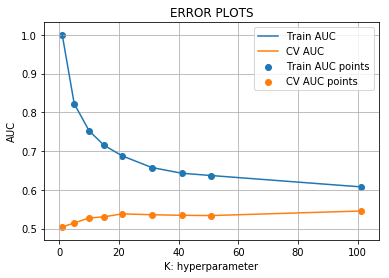

In [83]:
# Plotting error plot, AUC vs K plot to get best K(Bias-Variance trade-off)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

# Execute for different K values
K = [1, 5, 10, 15, 21, 31, 41, 51, 101]

for i in tqdm(K):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

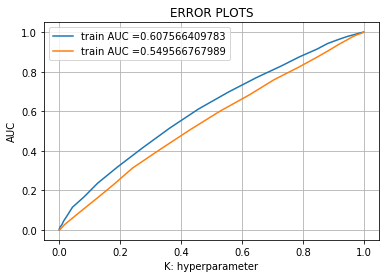

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=101)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [85]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [86]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.248173065563 for threshold 0.832
[[1219 1027]
 [4779 7525]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249224653952 for threshold 0.822
[[ 618 1034]
 [2854 6191]]


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_essay_tfidf,X_Train_titles_tfidf,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_essay_tfidf,X_CV_titles_tfidf,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_essay_tfidf,X_Test_titles_tfidf,
               X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(14550, 1091) (14550,)
(7167, 1091) (7167,)
(10697, 1091) (10697,)


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [15:11<00:00, 132.17s/it]


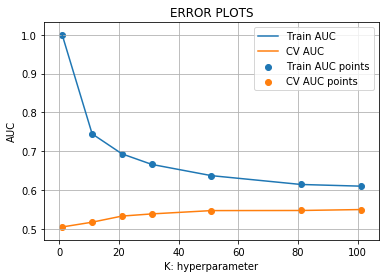

In [88]:
# Plotting error plot, AUC vs K plot to get best K(Bias-Variance trade-off)

train_auc = []
cv_auc = []

# Execute for different K values
K = [1, 11, 21, 31, 51, 81, 101]

for i in tqdm(K):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

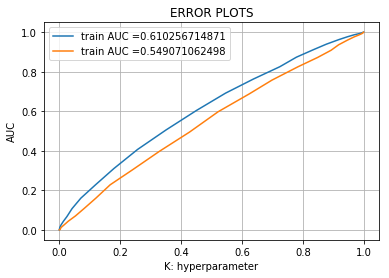

In [89]:
neigh = KNeighborsClassifier(n_neighbors=101)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [91]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.247855889445 for threshold 0.822
[[1019 1227]
 [3789 8515]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249525118867 for threshold 0.832
[[ 790  862]
 [3638 5407]]


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [92]:
# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_avg_w2v_vectors,X_Train_avg_w2v_titles_vectors,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_avg_w2v_vectors,X_CV_avg_w2v_titles_vectors,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_avg_w2v_vectors,X_Test_avg_w2v_titles_vectors,
               X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(14550, 701) (14550,)
(7167, 701) (7167,)
(10697, 701) (10697,)


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [31:17<00:00, 468.74s/it]


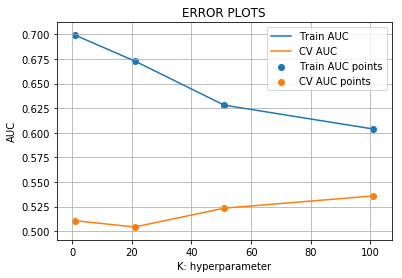

In [93]:
# Plotting error plot, AUC vs K plot to get best K(Bias-Variance trade-off)

train_auc = []
cv_auc = []

# Execute for different K values
K = [1, 21, 51, 101]

for i in tqdm(K):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

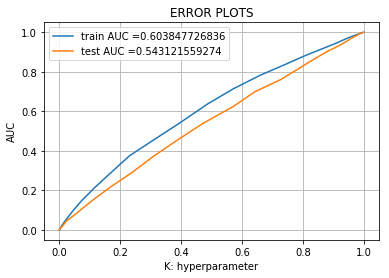

In [95]:
neigh = KNeighborsClassifier(n_neighbors=101)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [97]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249833284303 for threshold 0.842
[[1152 1094]
 [4466 7838]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249190576834 for threshold 0.851
[[ 873  779]
 [4175 4870]]


### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [99]:
# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_tfidf_w2v_vectors,X_Train_titles_tfidf_w2v_vectors,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_tfidf_w2v_vectors,X_CV_titles_tfidf_w2v_vectors,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_tfidf_w2v_vectors,X_Test_titles_tfidf_w2v_vectors,
               X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(14550, 701) (14550,)
(7167, 701) (7167,)
(10697, 701) (10697,)


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [22:20<00:00, 478.06s/it]


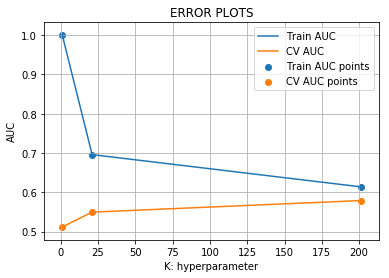

In [100]:
# Plotting error plot, AUC vs K plot to get best K(Bias-Variance trade-off)

train_auc = []
cv_auc = []

# Execute for different K values
K = [1, 21, 201]

for i in tqdm(K):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

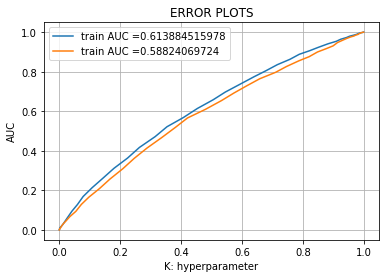

In [101]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=201)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [103]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249966498273 for threshold 0.841
[[1110 1136]
 [4200 8104]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249600967937 for threshold 0.841
[[ 771  881]
 [3124 5921]]


<h2>2.5 Feature selection with `SelectKBest` </h2>

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

from sklearn.feature_selection import SelectKBest, chi2

# Train data stack
X_tr = hstack((X_Train_categories_one_hot,X_Train_sub_categories_one_hot,X_Train_school_state_one_hot,
               X_Train_teacher_prefix_one_hot,X_Train_grade_cat_one_hot,X_Train_essay_bow,X_Train_titles_bow,
               X_train_price_norm)).tocsr()

# CV data Stack
X_cr = hstack((X_CV_categories_one_hot,X_CV_sub_categories_one_hot,X_CV_school_state_one_hot,
               X_CV_teacher_prefix_one_hot,X_CV_grade_cat_one_hot,X_CV_essay_bow,X_CV_titles_bow,
               X_cv_price_norm)).tocsr()

# Test Data Stack
X_te = hstack((X_Test_categories_one_hot,X_Test_sub_categories_one_hot,X_Test_school_state_one_hot,
               X_Test_teacher_prefix_one_hot,X_Test_grade_cat_one_hot,X_Test_essay_bow,X_Test_titles_bow,
               X_test_price_norm)).tocsr()

X_tr_new = SelectKBest(chi2, k=500).fit_transform(X_tr, y_train)
X_cr_new = SelectKBest(chi2, k=500).fit_transform(X_cr, y_cv)
X_te_new = SelectKBest(chi2, k=500).fit_transform(X_te, y_test)

print("Final Data matrix")
print(X_tr_new.shape, y_train.shape)
print(X_cr_new.shape, y_cv.shape)
print(X_te_new.shape, y_test.shape)
print("="*100)

Final Data matrix
(14550, 500) (14550,)
(7167, 500) (7167,)
(10697, 500) (10697,)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:40<00:00,  9.93s/it]


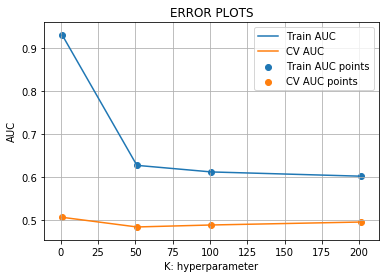

In [120]:
# Plotting error plot, AUC vs K plot to get best K(Bias-Variance trade-off)

train_auc = []
cv_auc = []

# Execute for different K values
K = [1, 51, 101, 201]

for i in tqdm(K):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_new, y_train)

    y_train_pred = batch_predict(neigh, X_tr_new)    
    y_cv_pred = batch_predict(neigh, X_cr_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

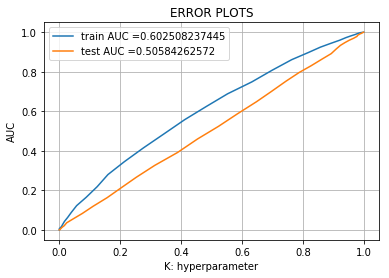

In [121]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=201)
neigh.fit(X_tr_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_new)    
y_test_pred = batch_predict(neigh, X_te_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [123]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249713748554 for threshold 0.831
[[1161 1085]
 [4620 7684]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249470888614 for threshold 0.841
[[ 285 1367]
 [1532 7513]]


<h1>3. Conclusions</h1>

In [125]:
# http://zetcode.com/python/prettytable/

x = PrettyTable()

x.field_names = ["Featurization", "Best K Value", "Train AUC", "Test AUC"]

x.add_row(["KNN Brute force on BOW", 101, 0.60, 0.54])
x.add_row(["KNN Brute force on TFIDF", 101, 0.61, 0.55])
x.add_row(["KNN brute force on Avg W2V", 101, 0.60, 0.54])
x.add_row(["KNN brute force on TFIDF W2V", 201, 0.61, 0.59])
x.add_row(["Feature selection with SelectKBest", 201, 0.60, 0.51])

print(x)

+------------------------------------+--------------+-----------+----------+
|           Featurization            | Best K Value | Train AUC | Test AUC |
+------------------------------------+--------------+-----------+----------+
|       KNN Brute force on BOW       |     101      |    0.6    |   0.54   |
|      KNN Brute force on TFIDF      |     101      |    0.61   |   0.55   |
|     KNN brute force on Avg W2V     |     101      |    0.6    |   0.54   |
|    KNN brute force on TFIDF W2V    |     201      |    0.61   |   0.59   |
| Feature selection with SelectKBest |     201      |    0.6    |   0.51   |
+------------------------------------+--------------+-----------+----------+
